In [80]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [81]:
df = pd.read_csv('/content/cardio_train.csv',sep=';')

In [82]:
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [83]:
df.drop('id', axis = 1, inplace = True)

In [84]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          70000 non-null  int64  
 1   gender       70000 non-null  int64  
 2   height       70000 non-null  int64  
 3   weight       70000 non-null  float64
 4   ap_hi        70000 non-null  int64  
 5   ap_lo        70000 non-null  int64  
 6   cholesterol  70000 non-null  int64  
 7   gluc         70000 non-null  int64  
 8   smoke        70000 non-null  int64  
 9   alco         70000 non-null  int64  
 10  active       70000 non-null  int64  
 11  cardio       70000 non-null  int64  
dtypes: float64(1), int64(11)
memory usage: 6.4 MB


In [85]:
print("{} tane var".format(df.duplicated().sum()))

24 tane var


In [86]:
dp = df[df.duplicated(keep=False)]
dp = dp.sort_values(by=['age', "gender", "height"], ascending= False) 

dp.head(2)

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
2677,22077,1,175,69.0,120,80,1,1,0,0,1,1
45748,22077,1,175,69.0,120,80,1,1,0,0,1,1


In [87]:
df.drop_duplicates(inplace= True)
print("{} tane var".format(df.duplicated().sum()))

0 tane var


In [88]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,69976.0,19468.950126,2467.374620,10798.0,17664.0,19703.0,21327.0,23713.0
gender,69976.0,1.349648,0.476862,1.0,1.0,1.0,2.0,2.0
height,69976.0,164.359152,8.211218,55.0,159.0,165.0,170.0,250.0
weight,69976.0,74.208519,14.397211,10.0,65.0,72.0,82.0,200.0
ap_hi,69976.0,128.820453,154.037729,-150.0,120.0,120.0,140.0,16020.0
ap_lo,69976.0,96.636261,188.504581,-70.0,80.0,80.0,90.0,11000.0
cholesterol,69976.0,1.366997,0.680333,1.0,1.0,1.0,2.0,3.0
gluc,69976.0,1.226535,0.572353,1.0,1.0,1.0,1.0,3.0
smoke,69976.0,0.088159,0.283528,0.0,0.0,0.0,0.0,1.0
alco,69976.0,0.053790,0.225604,0.0,0.0,0.0,0.0,1.0


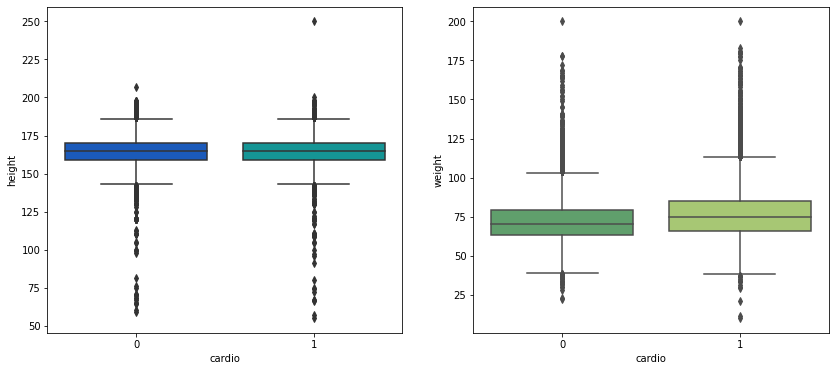

In [89]:
import seaborn as sns
import matplotlib.pyplot as plt


plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
sns.boxplot(x='cardio',y='height',data=df,palette='winter')
plt.subplot(1,2,2)
sns.boxplot(x='cardio',y='weight',data=df,palette='summer')

In [90]:
df["bmi"] = (df["weight"] / (df["height"] / 100)**2).round(1)

In [91]:
df.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,bmi
0,18393,2,168,62.0,110,80,1,1,0,0,1,0,22.0
1,20228,1,156,85.0,140,90,3,1,0,0,1,1,34.9
2,18857,1,165,64.0,130,70,3,1,0,0,0,1,23.5
3,17623,2,169,82.0,150,100,1,1,0,0,1,1,28.7
4,17474,1,156,56.0,100,60,1,1,0,0,0,0,23.0


In [92]:
df = df[(df["bmi"]>10) & (df["bmi"]<100)]

In [93]:
df.drop(["weight","height"],axis = 1,inplace = True)

In [94]:
df = df[(df['ap_hi'] < 250) & (df['ap_lo'] < 200)]
df = df[(df['ap_hi'] > 20) & (df['ap_lo'] > 20)]

df['age'] =  df['age'] / 365

In [95]:
df.head()

,age,gender,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,bmi
0,50.391781,2,110,80,1,1,0,0,1,0,22.0
1,55.419178,1,140,90,3,1,0,0,1,1,34.9
2,51.663014,1,130,70,3,1,0,0,0,1,23.5
3,48.282192,2,150,100,1,1,0,0,1,1,28.7
4,47.873973,1,100,60,1,1,0,0,0,0,23.0


In [96]:
df['cholesterol'].unique()

array([1, 3, 2])

In [97]:
df['cholesterol'] = df['cholesterol'].map({ 1: 'normal', 2: 'aboveNormal', 3: 'wellAboveNormal'})
df['gluc']=df['gluc'].map({ 1: 'normal', 2: 'aboveNormal', 3: 'wellAboveNormal'})

dummies = pd.get_dummies(df[['cholesterol','gluc']])


final_df = pd.concat([df,dummies],axis=1)
final_df.drop(['cholesterol','gluc'],axis=1,inplace=True)
final_df.head()

,age,gender,ap_hi,ap_lo,smoke,alco,active,cardio,bmi,cholesterol_aboveNormal,cholesterol_normal,cholesterol_wellAboveNormal,gluc_aboveNormal,gluc_normal,gluc_wellAboveNormal
0,50.391781,2,110,80,0,0,1,0,22.0,0,1,0,0,1,0
1,55.419178,1,140,90,0,0,1,1,34.9,0,0,1,0,1,0
2,51.663014,1,130,70,0,0,0,1,23.5,0,0,1,0,1,0
3,48.282192,2,150,100,0,0,1,1,28.7,0,1,0,0,1,0
4,47.873973,1,100,60,0,0,0,0,23.0,0,1,0,0,1,0


In [98]:
final_df["gender"] = final_df["gender"] % 2

In [104]:
from sklearn.model_selection import train_test_split

y = final_df["cardio"]
X = final_df.drop("cardio", axis = 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=17)

In [105]:
X_train.shape

(48107, 14)

In [106]:
X_test.shape

(20618, 14)

In [108]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

logreg = LogisticRegression()

logreg.fit(X_train,y_train)

y_pred = pd.Series(logreg.predict(X_test))

accuracy_score(y_test,y_pred)

0.7212629741003007